# Binomické Rozdělení

Binomické rozdělní popisuje $\mathbf{k}$ počet úspěchů v řadě $\mathbf{N}$ nezávislých pokusů.

Takže, v Lidlu akci na jogurty protože 1% naskladněných může mít jinou příchuť než deklaruje obal, v tu chvíli je vyslán Jonáš na nákupy (Jonáš proto, že Lucka je ještě malá a Miki musí pařit Witchera. Chudák Jonáš)

1. Jaká je pravděpodobnost, že koupí-li Jonek **1** jogurt, tak bude chutnat jinak? 
1. Jaká je pravděpodobnost, že koupí-li Jonek **3** jogurty, **všechny** budou chutnat jak mají?
1. Jaká je pravděpodobnost, že koupí-li Jonek **3** jogurty, **právě jeden** bude chutnat jinak?
1. Jaká je pravděpodobnost, že koupí-li Jonek **3** jogurty **alespoň** jeden bude chutnat jinak?


## Pravděpodobnost, že koupí-li Jonek **1** jogurt, tak bude chutnat jinak

Víme, že 1% je špatně označených.
Označme si tyto dva stavy pomocí dvou symbolů

- *špatně označen*, budeme psát $f$
- *správně označen* $t$

Nás teď zajímá, pravděpodobnost: $p(f)$, tedy pravděpodobnost, že jogurt bude $f$ špatně označen.

Tady ze zadání víme, že 1% je špatně označených, takže $p(f) = 0.01$

## Pravděpodobnost, že koupí-li Jonek 3 jogurty, všechny budou chutnat jak mají

Tohle můžeme rozepsat tak, že jonek donese 3 jogurty všechny se stavem $\left\{ t,t,t \right\}$

Víme, že $p(t)= 1 - p(f) = 0.99$ tedy výsledná pravděpodobnost je $p(t)^3 = 0.99^3 = 0.970299$

Jen pro zajímavost, můžeme přímo použít kanón ve formě binomické pravděpodobnostní distribuční funkce, tedy:

$$\binom{N}{k} p(t)^{k} (1-p(t))^{N-k}$$

Což při dosazení je:

$$\binom{3}{3} \cdot 0.99^{3} \cdot 0.01^{3-3} = \binom{3}{3} \cdot 0.99^{3} \cdot 0.01^{0} = 1 \cdot 0.99^{3} \cdot 1 = 0.99^{3} = 0.970299$$

## Pravděpodobnost, že koupí-li Jonek 3 jogurty, právě jeden bude chutnat jinak

Vlastně hledáme pravděpodobnost, že to, co Jonek vybere, bude buď:

- $(t,f,f)$, nebo $(f,t,f)$ a nebo $(f,f,t)$

Protože je fuk, kterou z těch tří variant vybereme, použije se triku s kombinančním číslem.
$$\binom{3}{1} \cdot 0.99^{2} \cdot 0.01^{3-2} = 0.029403$$

Dále následuje kód v programovacím jazyce **python** se sadou funkcí pro symbolické výpočty **sympy**


In [1]:
import sympy as sp
from sympy import binomial
from sympy import init_printing

init_printing()

N, k = sp.symbols("N, k", integer=True, positive=True)
t, f = sp.symbols("t, f")

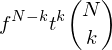

In [2]:
expression = binomial(N,k) * t**(k) * f**(N-k)
# Vypíše se výraz, do kterého dále dosadíme
expression

In [3]:
# A konečně dosadíme
result = expression.subs([(N,3),(k,1),(t,0.01), (f,0.99)])
result

## Pravděpodobnost, že koupí-li Jonek 3 jogurty, alespoň jeden bude chutnat jinak

Vlastně hledáme pravděpodobnost, že to, co Jonek vybere, bude buď:

- $(t,f,f)$, $(f,t,f)$, $(f,f,t)$
- $(t,t,f)$, $(t,f,t)$, $(f,t,t)$
- $(t,t,t)$

Protože je fuk, kterou z těch sedmi variant vybereme, použije se triku s kombinančním číslem.
$$p(alespon jeden) = \left( \binom{3}{1} \cdot 0.99^{2} \cdot 0.01^{1} \right) + \left( \binom{3}{2} \cdot 0.99^{1} \cdot 0.01^{2} \right) + \left(\binom{3}{3} \cdot 0.99^{0} \cdot 0.01^{3}\right)$$

Formálně zapsáno:

$$\sum_{k=1}^{N} \binom{N}{k} \cdot 0.99^{N-k} \cdot 0.01^{k}$$

Což se ale rovná

$$1 - \binom{3}{0} \cdot 0.99^{3} \cdot 0.01^{0}$$

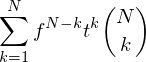

In [4]:
# Zkusme předchozí tvrzení ověřit
sum_expr = sp.Sum(expression,(k,1,N))
sum_expr

In [5]:
# Dosadíme hodnoty a vypočítáme
sum_expr.subs([(N,3),(t,0.01), (f,0.99)]).doit()

In [6]:
# Teď zkusíme 1 - (3 nad 0) * t^3 * f^0
1-expression.subs([(N,3), (k,0), (t,0.01), (f,0.99)])